In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

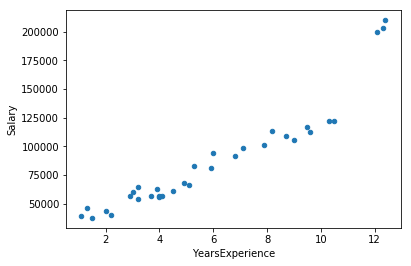

In [3]:
data=pd.read_csv('Salary_Data2.csv')
data.plot.scatter(x='YearsExperience',y='Salary')

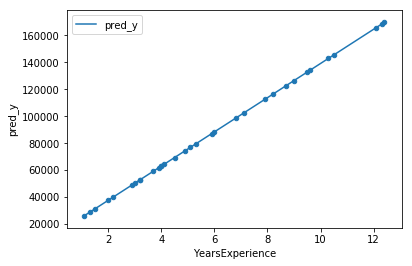

In [4]:
#使用sklearn内置的线性回归API,训练模型
import sklearn.linear_model as lm
model = lm.LinearRegression()
x,y=data.loc[:,:'YearsExperience'],data['Salary']
model.fit(x,y)
pred_y=model.predict(x)
data['pred_y']=pred_y
ax=data.plot(x='YearsExperience',y='pred_y')
data.plot.scatter(x='YearsExperience',y='pred_y',ax=ax)

In [5]:
#评估模型训练效果
test_x=x[::4]  #测试集输入数据
test_y=y[::4]  #测试集输出数据
#对测试样本进行预测
pred_test_y = model.predict(test_x)
pred_test_y
#打印真实输出与预测输出的  平均绝对值误差
import sklearn.metrics as sm
print(sm.mean_absolute_error(test_y,pred_test_y))

13057.8332542857


In [6]:
model.predict([[18]])

array([240835.85684862])

In [7]:
#打印真实输出与预测输出的  平均平方误差
print(sm.mean_squared_error(test_y,pred_test_y))

258803424.8304358


In [8]:
#打印真实输出与预测输出的  中位绝对值误差
print(sm.median_absolute_error(test_y,pred_test_y))

11652.23134862991


In [9]:
#r2_score() r2得分
print(sm.r2_score(test_y,pred_test_y))

0.8923299505451808


In [16]:
#训练岭回归模型
#找一组测试集样本,优选超参数：正则响系数
test_x,test_y=x[:30:4],y[:30:4]
params=np.arange(90,110)
for p in params:
    model=lm.Ridge(p)
    model.fit(x,y)
    #输出测试集得分
    pred_test_y=model.predict(test_x)
    print(p,':',sm.r2_score(test_y,pred_test_y))

90 : 0.9167620543385843
91 : 0.9168470017419112
92 : 0.9169202487094492
93 : 0.9169819457757067
94 : 0.9170322415220824
95 : 0.9170712826050363
96 : 0.9170992137838037
97 : 0.9171161779476598
98 : 0.9171223161427462
99 : 0.9171177675984642
100 : 0.9171026697534422
101 : 0.9170771582810883
102 : 0.917041367114733
103 : 0.9169954284723689
104 : 0.9169394728809963
105 : 0.9168736292005816
106 : 0.9167980246476327
107 : 0.9167127848184032
108 : 0.9166180337117266
109 : 0.9165138937514901


In [17]:
#通过上述论证，发现正则项=98时  模型达到最优状态
model=lm.Ridge(98)
model.fit(x,y)
#输出测试集得分
pred_test_y=model.predict(test_x)
print(p,':',sm.r2_score(test_y,pred_test_y))

109 : 0.9171223161427462


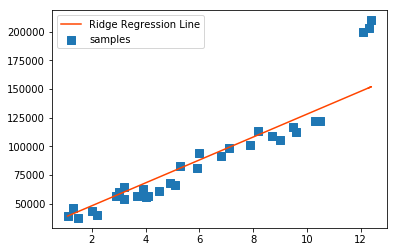

In [14]:
pred_y=model.predict(x)
plt.scatter(x,y,s=60,marker='s',label='samples')
plt.plot(x,pred_y,color='orangered',label='Ridge Regression Line')
plt.legend()